# LABORATORIO 3

### DATA SCIENCE

Saúl Contreras

Diego Estrada

Andrea Elias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline     
sns.set(color_codes=True)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## ANÁLISIS EXPLORATORIO

In [2]:
df = pd.read_csv("train.csv")
# To display the top 5 rows 
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.tail(5)            

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [5]:
df.shape

(42000, 785)

In [6]:
table = df.groupby("label").size().reset_index(name="Frecuencia").sort_values(['Frecuencia'], ascending=False)
table

,label,Frecuencia
1,1,4684
7,7,4401
3,3,4351
9,9,4188
2,2,4177
6,6,4137
0,0,4132
4,4,4072
8,8,4063
5,5,3795


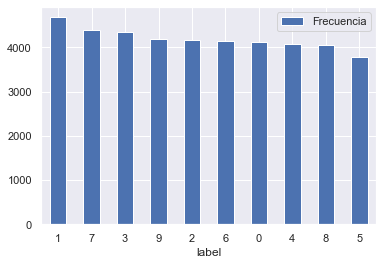

In [7]:
ax = table.plot.bar(x='label', y='Frecuencia', rot=0)

## CNN

In [8]:
x = df.to_numpy()[0:,1:].reshape(len(df),28,28,1) 
y = df.label.to_numpy()

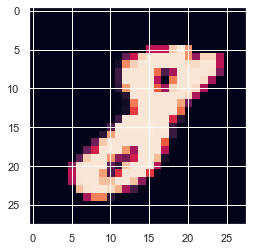

In [9]:
image = x[245]
plt.imshow(image.squeeze())

In [10]:
y[245]

8

Nomralización de datos

In [11]:
x = x/255

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Flattening para las imágenes del 28x28 pixels a 1D 787 pixels

In [13]:
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)

In [14]:
model = keras.Sequential(
    [keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
919/919 [==============================] - 2s 2ms/step - loss: 0.3600 - accuracy: 0.8986
Epoch 2/20
919/919 [==============================] - 1s 1ms/step - loss: 0.1704 - accuracy: 0.9512
Epoch 3/20
919/919 [==============================] - 1s 1ms/step - loss: 0.1204 - accuracy: 0.9651
Epoch 4/20
919/919 [==============================] - 2s 2ms/step - loss: 0.0916 - accuracy: 0.9730
Epoch 5/20
919/919 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9792
Epoch 6/20
919/919 [==============================] - 2s 2ms/step - loss: 0.0560 - accuracy: 0.9840
Epoch 7/20
919/919 [==============================] - 2s 2ms/step - loss: 0.0439 - accuracy: 0.9874
Epoch 8/20
919/919 [==============================] - 2s 2ms/step - loss: 0.0358 - accuracy: 0.9899
Epoch 9/20
919/919 [==============================] - 2s 2ms/step - loss: 0.0298 - accuracy: 0.9919
Epoch 10/20
919/919 [==============================] - 2s 2ms/step - loss: 0.0231 - accuracy: 0.9936

Evaluacion del modelo

In [15]:
model.evaluate(x_test,y_test)

394/394 [==============================] - 1s 1ms/step - loss: 0.1437 - accuracy: 0.9687


[0.1436559408903122, 0.9687301516532898]

In [16]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=1)
y_prediction

array([7, 0, 3, ..., 5, 5, 3])

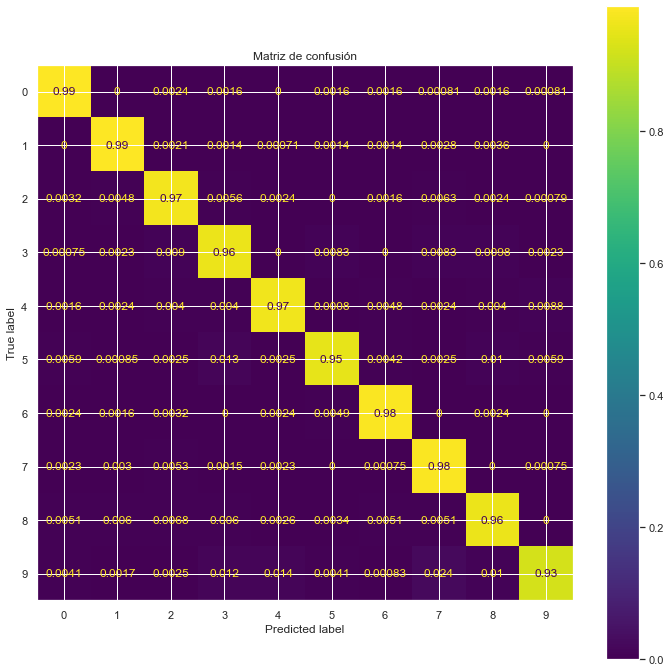

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(y_test,y_prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5,6,7,8,9])
disp = disp.plot(ax=ax)
ax.set_title("Matriz de confusión")
plt.show()
%matplotlib inline

## KNN

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
x = df.drop(['label'], axis = 1)
y = df['label']
x = x/255.0
test_df = df/255.0
x = x.values
test_df = test_df.values

In [20]:
print(x.shape, y.shape)

(42000, 784) (42000,)


In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 89)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(33600, 784) (8400, 784)
(33600,) (8400,)


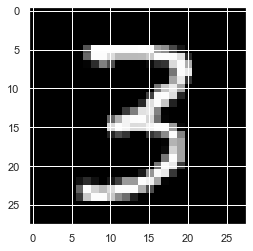

In [22]:
def drawImg(sample):
    sample = sample.reshape((28,28))
    plt.imshow(sample, cmap = 'gray')
img = x_train[10]
drawImg(img)

In [23]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [24]:
def KNN(X, y, queryPoint, k = 5):
    
    vals = []
    m = X.shape[0] 
    
    for i in range(m):
        d = dist(queryPoint, X[i]) 
        vals.append((d, y.iloc[i])) 
        
    vals = sorted(vals) 
    vals = vals[:k] 
    
    new_vals = np.unique([v[1] for v in vals], return_counts=True) 
    
    idx = new_vals[1].argmax() 
    pred = new_vals[0][idx] 
    
    return pred
    

Predcition:  1


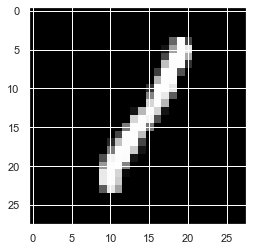

In [25]:
img = x_val[88]

pred = KNN(x_train, y_train, img, k = 3)

drawImg(img)
print("Predcition: ", pred)


1

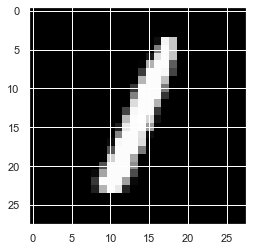

In [26]:
knn = KNeighborsClassifier()

# Fit the algorithm with the train data
knn.fit(x_train,y_train)

drawImg(x_val[90].reshape((28,28)))
knn.predict([x_val[0]])[0]

In [27]:
predictions = knn.predict(x_val)
accuracy_score(y_val, predictions)

0.9677380952380953

# DEEP LEARNING MODEL
After doing the exploration of the data we do the imports required for the deep learning model

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import ensemble, model_selection

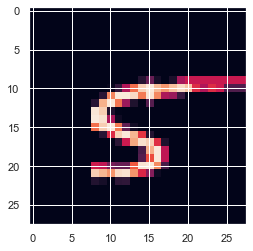

In [31]:
df = pd.read_csv("train.csv")
x = df.to_numpy()[0:,1:].reshape(len(df),28,28,1) 
y = df.label.to_numpy()
image = x[244]
plt.imshow(image.squeeze())

In [32]:
y[244]

5

In [33]:
train = pd.read_csv("train.csv").values
X = train[:, 1:]
Y = train[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
forest = ensemble.RandomForestClassifier(
        n_estimators = 1000,
        max_depth = 10,
        min_samples_split = 4,
        n_jobs = -1,
        random_state = 1 )
forest = forest.fit(x_train, y_train)

In [34]:
forest.score(x_train, y_train)

0.9753061224489796

In [35]:
scores = model_selection.cross_val_score(forest, x_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1)
scores

array([0.94795918, 0.94251701, 0.94455782, 0.94829932, 0.94013605,
       0.94693878, 0.94285714, 0.94285714, 0.94863946, 0.94693878])

In [36]:
scores.mean()

0.9451700680272109

In [37]:
forest_ = forest.predict(x_test)

In [38]:
metrics.classification_report(y_test,forest_)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97      1241\n           1       0.96      0.98      0.97      1394\n           2       0.94      0.94      0.94      1230\n           3       0.94      0.91      0.92      1299\n           4       0.94      0.94      0.94      1187\n           5       0.95      0.93      0.94      1135\n           6       0.96      0.97      0.97      1264\n           7       0.95      0.93      0.94      1357\n           8       0.93      0.93      0.93      1198\n           9       0.90      0.92      0.91      1295\n\n    accuracy                           0.94     12600\n   macro avg       0.94      0.94      0.94     12600\nweighted avg       0.94      0.94      0.94     12600\n'

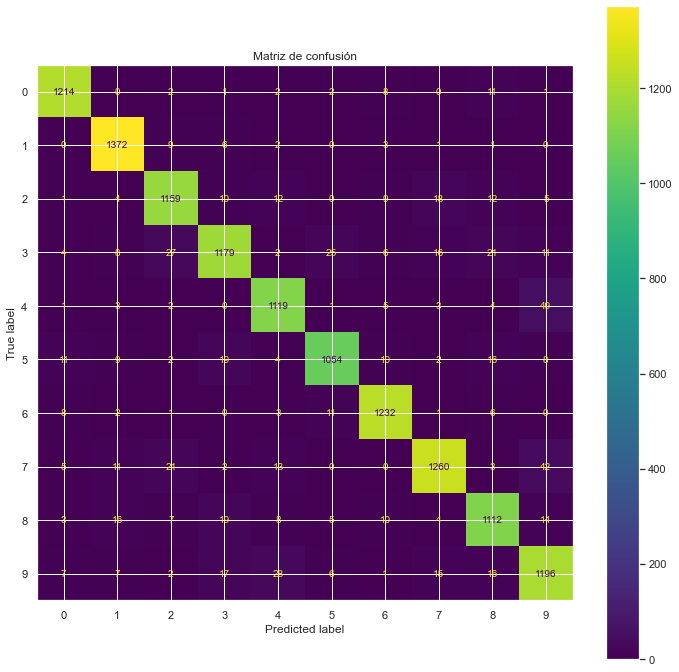

In [39]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = metrics.confusion_matrix(y_test,forest_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5,6,7,8,9])
disp = disp.plot(ax=ax)
ax.set_title("Matriz de confusión")
plt.show()
%matplotlib inline

# ANÁLISIS

## EVALUACIÓN CON MANUSCRITOS ELABORADOS

In [42]:
import csv
from PIL import Image
def create_csv(name, output):
    original = Image.open(name)
    mod = original.convert('L')
    array = np.asarray(mod.resize((28,28)), dtype=np.int64)
    my_array = [0,]
    header = ['label']
    count = 0
    for i in array:
        for j in i:
            my_array.append(j)
            header.append('pixel' + str(count))
            count += 1
    with open(output, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        writer.writerow(my_array)

In [41]:
def write_prediction(prediction, name):
    df = pd.read_csv(name)
    x = df.to_numpy()[0:,1:].reshape(len(df),28,28,1) 
    y = df.label.to_numpy()
    X = train[:, 1:]
    Y = train[:, 0]
    solution = prediction.predict(X)
    image = x[0]
    plt.imshow(image.squeeze())
    return(solution)

0

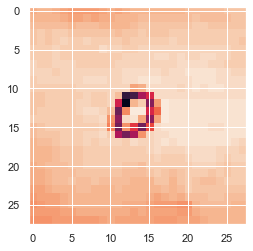

In [45]:
create_csv('0.jpeg', '0.csv')
write_prediction(forest, '0.csv')[1]

1

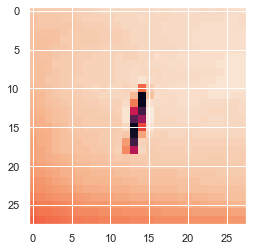

In [49]:
create_csv('1.jpeg', '1.csv')
write_prediction(forest, '1.csv')[0]

1

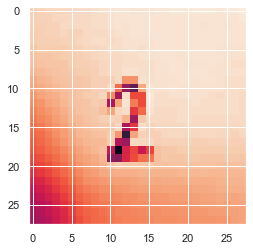

In [48]:
create_csv('2.jpeg', '2.csv')
write_prediction(forest, '2.csv')[0]

3

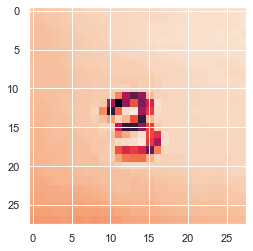

In [54]:
create_csv('3.jpeg', '3.csv')
write_prediction(forest, '3.csv')[7]

5

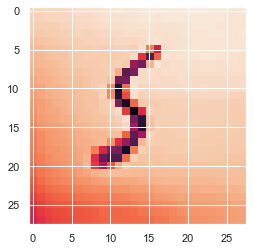

In [55]:
create_csv('5.jpeg', '5.csv')
write_prediction(forest, '5.csv')[8]